In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

In [5]:
df = pd.read_csv("C:\\Users\\INTERFACE\\OneDrive\\Desktop\\ENTRI ASSIGNMENT\\ML\\Employee.csv")
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


# Data Exploration

In [7]:
print("\nData Exploration")
print("Shape:", df.shape)
print("\nUnique values in each column:")
for col in df.columns:
    print(f"{col} ({len(df[col].unique())} unique): {df[col].unique()}")

print("\nStatistical Summary:")
print(df.describe(include='all'))

df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]
print("\nRenamed Columns:", df.columns.tolist())


Data Exploration
Shape: (148, 6)

Unique values in each column:
company (7 unique): ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
age (30 unique): [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
salary (41 unique): [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
place (12 unique): ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
country (1 unique): ['India']
gender (2 unique): [0 1]

Statistical Summary:
       company         age       salary   place country      gender
count      140  130.000000   124.000000     134     148  148.000000
unique       6         NaN          NaN      11       1         NaN
top 

# Data Cleaning

In [8]:
print("\nData Cleaning")

# Replace age=0 with NaN
df['age'] = df['age'].replace(0, np.nan)

# To show missing values
print("\nMissing Values Before:")
print(df.isnull().sum())

# Fill NaNs with appropriate methods
df.fillna(df.median(numeric_only=True), inplace=True)
for col in df.select_dtypes(include='object'):
    df[col].fillna(df[col].mode()[0], inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Outlier detection using IQR
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    return data[(data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR))]

outliers = pd.concat([detect_outliers_iqr(df, col) for col in df.select_dtypes(include=np.number)], axis=0)
print(f"\nTotal Outliers Found: {len(outliers)}")


Data Cleaning

Missing Values Before:
company     8
age        24
salary     24
place      14
country     0
gender      0
dtype: int64

Total Outliers Found: 32


# Data Analysis


Data Analysis


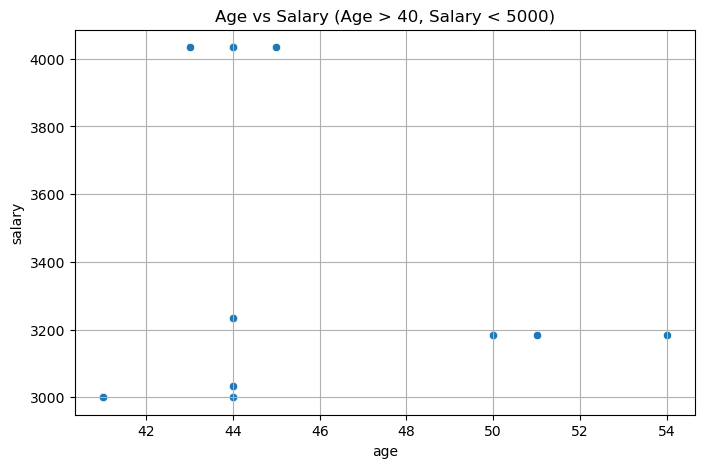


People Count by Place:
 Mumbai        48
Calcutta      32
Chennai       14
Delhi         14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: place, dtype: int64


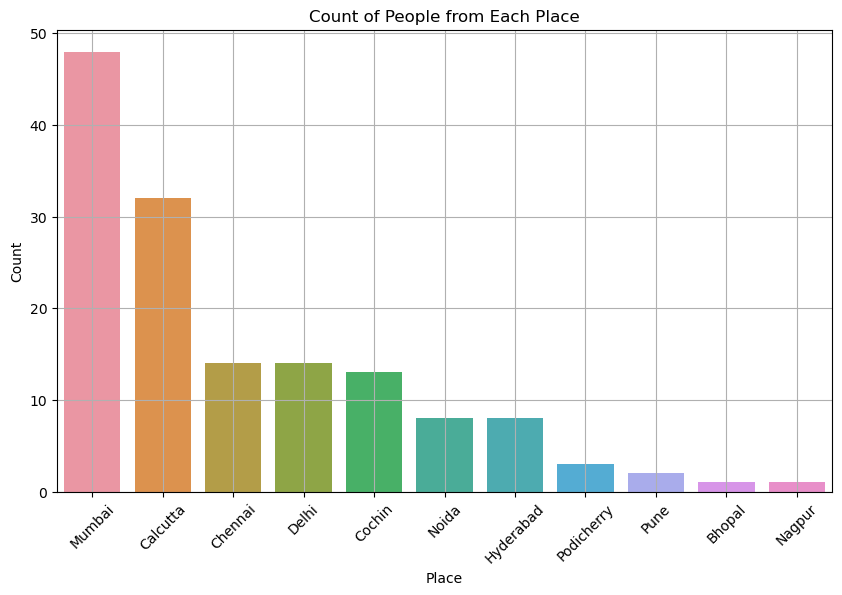

In [9]:
print("\nData Analysis")
filtered_df = df[(df['age'] > 40) & (df['salary'] < 5000)]

# Plot Age vs Salary
plt.figure(figsize=(8, 5))
sns.scatterplot(data=filtered_df, x='age', y='salary')
plt.title('Age vs Salary (Age > 40, Salary < 5000)')
plt.grid(True)
plt.show()

# Count of people by place
place_counts = df['place'].value_counts()
print("\nPeople Count by Place:\n", place_counts)

# Bar Plot for place
plt.figure(figsize=(10, 6))
sns.barplot(x=place_counts.index, y=place_counts.values)
plt.xticks(rotation=45)
plt.title('Count of People from Each Place')
plt.ylabel('Count')
plt.xlabel('Place')
plt.grid(True)
plt.show()

# Data Encoding

In [12]:
print("\nData Encoding")

# Label encode binary categorical columns, one-hot encode multi-class
label_enc = LabelEncoder()
for col in df.select_dtypes(include='object'):
    if df[col].nunique() == 2:
        df[col] = label_enc.fit_transform(df[col])
    else:
        df = pd.get_dummies(df, columns=[col], drop_first=True)


Data Encoding


# Feature Scaling

In [13]:
print("\nFeature Scaling")
scaler_std = StandardScaler()
scaler_mm = MinMaxScaler()

df_std_scaled = df.copy()
df_mm_scaled = df.copy()

df_std_scaled[df.columns] = scaler_std.fit_transform(df)
df_mm_scaled[df.columns] = scaler_mm.fit_transform(df)

print("Standard Scaled Data (first 5 rows):\n", df_std_scaled.head())
print("\nMinMax Scaled Data (first 5 rows):\n", df_mm_scaled.head())


Feature Scaling
Standard Scaled Data (first 5 rows):
         age    salary    gender  company_Congnizant  company_Infosys  \
0 -1.484676 -0.100827 -0.534522           -0.118678        -0.652490   
1 -0.267174 -0.100827 -0.534522           -0.118678         1.532592   
2  0.341577 -1.243735 -0.534522           -0.118678        -0.652490   
3  0.950328 -0.947426 -0.534522           -0.118678         1.532592   
4 -1.119426 -0.524127 -0.534522           -0.118678        -0.652490   

   company_Infosys Pvt Lmt  company_TCS  company_Tata Consultancy Services  \
0                -0.118678     1.183216                          -0.118678   
1                -0.118678    -0.845154                          -0.118678   
2                -0.118678     1.183216                          -0.118678   
3                -0.118678    -0.845154                          -0.118678   
4                -0.118678     1.183216                          -0.118678   

   place_Calcutta  place_Chennai  place_Coc